<a href="https://colab.research.google.com/github/thisisindrajit/Using-Deep-CNN-to-enhance-low-res-photos-to-match-the-quality-of-DSLR-cameras/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References and citation

This notebook contains references for code from this repository: https://github.com/aiff22/DPED.git

**This project is for educational purposes only.**

<br>
<hr>
<br>

Citation:

<pre>
@inproceedings{ignatov2017dslr,
  title={DSLR-Quality Photos on Mobile Devices with Deep Convolutional Networks},
  author={Ignatov, Andrey and Kobyshev, Nikolay and Timofte, Radu and Vanhoey, Kenneth and Van Gool, Luc},
  booktitle={Proceedings of the IEEE International Conference on Computer Vision},
  pages={3277--3285},
  year={2017}
}
</pre>



# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import imageio
import PIL #pillow
import tensorflow as tf
from tensorflow import keras
from __future__ import print_function
import scipy
import os
import sys

#tensorflow version
print(tf.__version__)

ModuleNotFoundError: ignored

# Loading the dataset

In [ ]:
#helper functions to load batch training data and test data

#function to load test data
def load_test_data(phone, dped_dir, IMAGE_SIZE):

    #print(phone + " " + dped_dir + " " + str(IMAGE_SIZE))
    
    test_directory_phone = dped_dir + str(phone) + '/test_data/patches/' + str(phone) + '/'
    test_directory_dslr = dped_dir + str(phone) + '/test_data/patches/canon/'

    #finding no of test images
    NUM_TEST_IMAGES = len([name for name in os.listdir(test_directory_phone)
                           if os.path.isfile(os.path.join(test_directory_phone, name))])
    
    #print(NUM_TEST_IMAGES) #201 
    #print(IMAGE_SIZE) #30000

    #empty arrays with no of rows = number of test images and no of columns = 100*100*3
    test_data = np.zeros((NUM_TEST_IMAGES, IMAGE_SIZE))
    test_answ = np.zeros((NUM_TEST_IMAGES, IMAGE_SIZE))

    for i in range(0,NUM_TEST_IMAGES):
        
        I = np.asarray(imageio.imread(test_directory_phone + str(i) + '.jpg'))
        I = np.float16(np.reshape(I, [1, IMAGE_SIZE]))/255
        test_data[i, :] = I
        
        I = np.asarray(imageio.imread(test_directory_dslr + str(i) + '.jpg'))
        I = np.float16(np.reshape(I, [1, IMAGE_SIZE]))/255
        test_answ[i, :] = I

        if i % 100 == 0:
            print(str(round(i * 100 / NUM_TEST_IMAGES)) + "% done")

    return test_data, test_answ

#function to load training data
def load_batch(phone, dped_dir, TRAIN_SIZE, IMAGE_SIZE):

    #print(phone + " " + dped_dir + " " + IMAGE_SIZE)

    train_directory_phone = dped_dir + str(phone) + '/training_data/' + str(phone) + '/'
    train_directory_dslr = dped_dir + str(phone) + '/training_data/canon/'

    #finding no of training images
    NUM_TRAINING_IMAGES = len([name for name in os.listdir(train_directory_phone)
                               if os.path.isfile(os.path.join(train_directory_phone, name))])

    # if TRAIN_SIZE == -1 then load all images

    if TRAIN_SIZE == -1:
        TRAIN_SIZE = NUM_TRAINING_IMAGES
        #here np.arange returns an array with values from 0 to TRAIN_SIZE-1 -> [0,1,2,3.....]
        TRAIN_IMAGES = np.arange(0, TRAIN_SIZE)
    else:
        #randomly selecting TRAIN_SIZE no of images from total no of training images
        TRAIN_IMAGES = np.random.choice(np.arange(0, NUM_TRAINING_IMAGES), TRAIN_SIZE, replace=False)

    #empty arrays with no of rows = number of training images and no of columns = 100*100*3
    train_data = np.zeros((TRAIN_SIZE, IMAGE_SIZE))
    train_answ = np.zeros((TRAIN_SIZE, IMAGE_SIZE))

    i = 0

    for img in TRAIN_IMAGES:

        I = np.asarray(imageio.imread(train_directory_phone + str(img) + '.jpg'))
        I = np.float16(np.reshape(I, [1, IMAGE_SIZE])) / 255
        train_data[i, :] = I

        I = np.asarray(imageio.imread(train_directory_dslr + str(img) + '.jpg'))
        I = np.float16(np.reshape(I, [1, IMAGE_SIZE])) / 255
        train_answ[i, :] = I

        i += 1
        if i % 100 == 0:
            print(str(round(i * 100 / TRAIN_SIZE)) + "% done")

    return train_data, train_answ

# test_data, test_answ = load_test_data("sony", "dped/", 100*100*3)

test_data, test_ans = load_test_data("sony", "drive/MyDrive/Innovation Practices Lab/dped_small/", 100*100*3)
print("Test ans")
print(test_ans)

train_data, train_ans = load_batch("iphone", "drive/MyDrive/Innovation Practices Lab/dped_small/", -1, 100*100*3)
print("Training ans")
print(train_ans)

0% done
50% done
100% done
Test ans
[[0.52148438 0.46655273 0.3215332  ... 0.49023438 0.58837891 0.57666016]
 [0.49414062 0.12939453 0.1607666  ... 0.91357422 0.78808594 0.72949219]
 [0.3293457  0.26269531 0.1529541  ... 0.37255859 0.32543945 0.27832031]
 ...
 [0.41967773 0.27832031 0.13720703 ... 0.20397949 0.08233643 0.00392151]
 [0.28637695 0.25488281 0.24316406 ... 0.46264648 0.46264648 0.45483398]
 [0.58056641 0.54101562 0.50585938 ... 0.07452393 0.11767578 0.10198975]]
50% done
100% done
Training ans
[[0.36474609 0.42749023 0.52539062 ... 0.41967773 0.45092773 0.53320312]
 [0.64306641 0.78417969 0.83154297 ... 0.01960754 0.05490112 0.05099487]
 [0.76855469 0.76464844 0.75683594 ... 0.94921875 0.94921875 0.95703125]
 ...
 [0.24316406 0.39990234 0.12548828 ... 0.27832031 0.25097656 0.21179199]
 [0.85888672 0.90185547 0.91748047 ... 0.48632812 0.67822266 0.80761719]
 [0.27441406 0.27832031 0.22351074 ... 0.51367188 0.55664062 0.58056641]]


# Models

In [ ]:
#helper function to define the weight variable
def weight(shape, name):

  weight_var = tf.compat.v1.truncated_normal(shape, stddev=0.01)  
  return tf.Variable(weight_var, name=name)

#helper function to define the bias variable
def bias(shape, name):

  bias_var = tf.constant(0.01, shape=shape)
  return tf.Variable(bias_var, name=name)

#helper function to define a 2d convolutional layer
def conv2d(x, W):
  # tf.nn.conv2d computes a 2-D convolution given a input and 4-D tensor having various values related to the kernel/filter. 
  # x is the input, W is the parameter with shape [filter_height, filter_width, in_channels, out_channels]
  # padding='SAME' means the output must have the same height/width dimension as the input.
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

#helper function to perform Batch Normalization
#reference for batch normalization - https://towardsdatascience.com/batch-normalization-explained-algorithm-breakdown-23d2794511c
def batch_normalization(convnet):

  #here i.value must be present for sure ####VERY IMPORTANT
  #batch, rows, cols, channels = [i.value for i in convnet.get_shape()]

  batch, rows, cols, channels = [i for i in convnet.get_shape()]
  var_shape = [channels]

  mean, variance = tf.compat.v1.nn.moments(convnet, [1,2], keepdims=True)
  shift = tf.Variable(tf.zeros(var_shape))
  scale = tf.Variable(tf.ones(var_shape))

  epsilon = 1e-3
  normalized = (convnet-mean)/(variance + epsilon)**(.5)

  return scale * normalized + shift


#helper function to create a convolutional layer
def convolutionallayer(net, num_filters, filter_size, strides, batch_nn=True):
    
  weights_init = initialize_vars(net, num_filters, filter_size)
  strides_shape = [1, strides, strides, 1] #NHWC format - N, Height, Width, Channels. For the most common case of the same horizontal and vertical strides, strides = [1, stride, stride, 1].
  bias = tf.Variable(tf.constant(0.01, shape=[num_filters]))

  #here weights_init is nothing but the parameters for filter with shape [filter_height, filter_width, in_channels, out_channels]
  net = tf.nn.conv2d(net, weights_init, strides_shape, padding='SAME') + bias   
  net = leakyReLU(net)

  #if batch normalization needs to be done
  if batch_nn:
       net = batch_normalization(net)

  return net

#helper function to initialize variables before creating a convolutional layer
def initialize_vars(net, out_channels, filter_size, transpose=False):

  #here i.value must be present for sure ####VERY IMPORTANT
  #_, rows, cols, in_channels = [i.value for i in net.get_shape()] 

  _, rows, cols, in_channels = [i for i in net.get_shape()]

  if not transpose:
    weights_shape = [filter_size, filter_size, in_channels, out_channels]
  else:
    weights_shape = [filter_size, filter_size, out_channels, in_channels]

  #check this out
  weights_init = tf.Variable(tf.compat.v1.truncated_normal(weights_shape, stddev=0.01, seed=1), dtype=tf.float32)
  
  return weights_init

#Leaky ReLU function
def leakyReLU(x, alpha = 0.2):
  return tf.maximum(alpha * x, x)

#------------------------------------------------------------------
#main models:

#generator network
def residualnetwork(input_image):

  #this is used to store all the variables related to generator as a whole by tensorflow
  with tf.compat.v1.variable_scope("generator"):

    #first layer (layer which has input image as the layer input)
    W1 = weight([9,9,3,64], name="W1")
    b1 = bias([64], name="b1")

    #ReLU activation of sum of conv2d neural network weight outputs and bias
    c1 = tf.keras.activations.relu(conv2d(input_image, W1) + b1)

    #residual block 1

    W2 = weight([3, 3, 64, 64], name="W2")
    b2 = bias([64], name="b2")

    c2 = tf.keras.activations.relu(batch_normalization(conv2d(c1, W2) + b2))

    W3 = weight([3, 3, 64, 64], name="W3")
    b3 = bias([64], name="b3");
    
    c3 = tf.keras.activations.relu(batch_normalization(conv2d(c2, W3) + b3)) + c1 #here we add c1 because it is a residual neural network

    #residual block 2

    W4 = weight([3, 3, 64, 64], name="W4")
    b4 = bias([64], name="b4")

    c4 = tf.keras.activations.relu(batch_normalization(conv2d(c3, W4) + b4))

    W5 = weight([3, 3, 64, 64], name="W5")
    b5 = bias([64], name="b5");

    c5 = tf.keras.activations.relu(batch_normalization(conv2d(c4, W5) + b5)) + c3

    #residual block 3

    W6 = weight([3, 3, 64, 64], name="W6")
    b6 = bias([64], name="b6")

    c6 = tf.keras.activations.relu(batch_normalization(conv2d(c5, W6) + b6))

    W7 = weight([3, 3, 64, 64], name="W7")
    b7 = bias([64], name="b7");
    
    c7 = tf.keras.activations.relu(batch_normalization(conv2d(c6, W7) + b7)) + c5

    # residual 4

    W8 = weight([3, 3, 64, 64], name="W8")
    b8 = bias([64], name="b8")

    c8 = tf.keras.activations.relu(batch_normalization(conv2d(c7, W8) + b8))

    W9 = weight([3, 3, 64, 64], name="W9")
    b9 = bias([64], name="b9")

    c9 = tf.keras.activations.relu(batch_normalization(conv2d(c8, W9) + b9)) + c7

    #Additional convolutional layers

    W10 = weight([3, 3, 64, 64], name="W10")
    b10 = bias([64], name="b10")

    c10 = tf.keras.activations.relu(conv2d(c9, W10) + b10)

    W11 = weight([3, 3, 64, 64], name="W11")
    b11 = bias([64], name="b11")

    c11 = tf.keras.activations.relu(conv2d(c10, W11) + b11)

    #Output layer

    W12 = weight([9, 9, 64, 3], name="W12") 
    b12 = bias([3], name="b12");

    enhanced = tf.keras.activations.tanh(conv2d(c11, W12) + b12) * 0.58 + 0.5

  return enhanced

#discriminator network
def adverserialnetwork(image):
  
  with tf.compat.v1.variable_scope("discriminator"):
    
    conv1 = convolutionallayer(image, 48, 11, 4, batch_nn = False)
    conv2 = convolutionallayer(conv1, 128, 5, 2)
    conv3 = convolutionallayer(conv2, 192, 3, 1)
    conv4 = convolutionallayer(conv3, 192, 3, 1)
    conv5 = convolutionallayer(conv4, 128, 3, 2)

    flat_size = 128 * 7 * 7

    #check this out
    conv5_flat = tf.reshape(conv5, [-1, flat_size])

    W_fc = tf.Variable(tf.compat.v1.truncated_normal([flat_size, 1024], stddev=0.01))
    bias_fc = tf.Variable(tf.constant(0.01, shape=[1024]))

    fc = leakyReLU(tf.matmul(conv5_flat, W_fc) + bias_fc)

    W_out = tf.Variable(tf.compat.v1.truncated_normal([1024, 2], stddev=0.01))
    bias_out = tf.Variable(tf.constant(0.01, shape=[2]))

    #check out working of softmax with example. Find a reference and attach it here.
    adv_out = tf.nn.softmax(tf.matmul(fc, W_out) + bias_out)
    
  return adv_out

# Losses

In [ ]:
PATCH_HEIGHT = 100
PATCH_WIDTH = 100
PATCH_SIZE = PATCH_WIDTH * PATCH_HEIGHT * 3
batch_size = 50

with tf.Graph().as_default(), tf.compat.v1.Session() as sess:

  phone_ = tf.compat.v1.placeholder(tf.float32, [None, PATCH_SIZE])
  #reshaping the placeholder to match the shape of image
  phone_image = tf.reshape(phone_, [-1, PATCH_HEIGHT, PATCH_WIDTH, 3])

  dslr_ = tf.compat.v1.placeholder(tf.float32, [None, PATCH_SIZE])
  #reshaping the placeholder to match the shape of image
  dslr_image = tf.reshape(dslr_, [-1, PATCH_HEIGHT, PATCH_WIDTH, 3])

  adv_ = tf.compat.v1.placeholder(tf.float32, [None, 1])

  # get processed enhanced image from the model
  enhanced = residualnetwork(phone_image)

  # transform both dslr and enhanced images to grayscale
  enhanced_gray = tf.reshape(tf.image.rgb_to_grayscale(enhanced), [-1, PATCH_WIDTH * PATCH_HEIGHT])
  dslr_gray = tf.reshape(tf.image.rgb_to_grayscale(dslr_image),[-1, PATCH_WIDTH * PATCH_HEIGHT])

  # push randomly the enhanced or dslr image to an adversarial CNN-discriminator
  adversarial_ = tf.multiply(enhanced_gray, 1 - adv_) + tf.multiply(dslr_gray, adv_)
  adversarial_image = tf.reshape(adversarial_, [-1, PATCH_HEIGHT, PATCH_WIDTH, 1])

  discrim_predictions = adverserialnetwork(adversarial_image)

#1)texture (adversarial) loss

  #concatenates values of the two tensors
  #https://www.tensorflow.org/api_docs/python/tf/concat
  #here 1 denotes axis. 1 means x axis, 0 means y axis

  discrim_target = tf.concat([adv_, 1 - adv_], 1)

  #clip_by_value clips tensor values to a specified min and max
  #SYNTAX -> tf.clip_by_value(t, clip_value_min, clip_value_max, name=None)

  loss_discrim = -tf.reduce_sum(discrim_target * tf.math.log(tf.clip_by_value(discrim_predictions, 1e-10, 1.0)))
  loss_texture = -loss_discrim

  correct_predictions = tf.equal(tf.argmax(discrim_predictions, 1), tf.argmax(discrim_target, 1))
  #check this out
  discim_accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

  print(discim_accuracy)

Tensor("Placeholder:0", shape=(None, 30000), dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)


# Testing area

In [ ]:
#this block is for testing

f = open("drive/MyDrive/Innovation Practices Lab/test.txt", "r");
print(f.read())

This is a test file to check whether the file path is working.


In [ ]:
x1 = tf.constant([[2, 2],[3,3]])
x = tf.constant([[2, 2, 1, 1], [1, 1, 2, 2]])

print((tf.concat([x1, 1-x1], 1)) * tf.clip_by_value(x, 0, 3))
print(tf.reduce_sum((tf.concat([x1, 1-x1], 1) * tf.clip_by_value(x, 0, 3))))

tf.Tensor(
[[ 4  4 -1 -1]
 [ 3  3 -4 -4]], shape=(2, 4), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


(1, 100, 100, 3)
tf.Tensor(
[[[[151 184 193]
   [148 181 190]
   [149 179 189]
   ...
   [153 183 191]
   [149 179 187]
   [146 176 184]]

  [[150 183 192]
   [147 180 189]
   [148 178 188]
   ...
   [152 182 190]
   [148 178 186]
   [149 179 187]]

  [[152 185 194]
   [147 180 189]
   [146 176 186]
   ...
   [155 185 193]
   [152 182 190]
   [150 180 188]]

  ...

  [[ 13  22  21]
   [ 13  22  21]
   [ 12  21  20]
   ...
   [  9  19  20]
   [  8  18  19]
   [  9  19  20]]

  [[ 14  23  22]
   [ 11  20  19]
   [ 11  20  19]
   ...
   [ 10  20  19]
   [  9  19  18]
   [ 10  20  19]]

  [[ 13  22  21]
   [ 12  21  20]
   [ 12  21  20]
   ...
   [ 10  20  19]
   [  8  18  17]
   [  7  17  16]]]], shape=(1, 100, 100, 3), dtype=uint8)


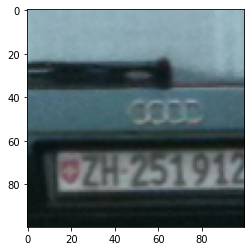

In [ ]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("./1.jpg", 0)
plt.imshow(img)

phone_image = tf.reshape(img, [-1, PATCH_HEIGHT, PATCH_WIDTH, 3])
print(phone_image.get_shape())
print(phone_image)